In [1]:
import os
os.chdir("../..")
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from data.gp_dataloader import GPDataGenerator
from data.image_dataloader import ImageDataProcessor, get_masks
from models.anp import ANPModel, train_1d, train_2d
from utils import Attention, plot_np_results

# Set the random seed for reproducibility
# torch.manual_seed(1)
# np.random.seed(1)

In [2]:
trainset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

train_mnist, val_mnist = torch.utils.data.random_split(trainset_mnist, [54000, 6000])

train_mnist_loader = DataLoader(dataset=train_mnist, shuffle=True, batch_size=16)
val_mnist_loader = DataLoader(dataset=val_mnist, shuffle=False, batch_size=16)
test_mnist_loader = DataLoader(dataset=test_mnist, shuffle=False, batch_size=1)

train_processor = ImageDataProcessor()
val_processor = ImageDataProcessor(testing=True)

torch.Size([16, 1, 28, 28])


/home/thomas/miniconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


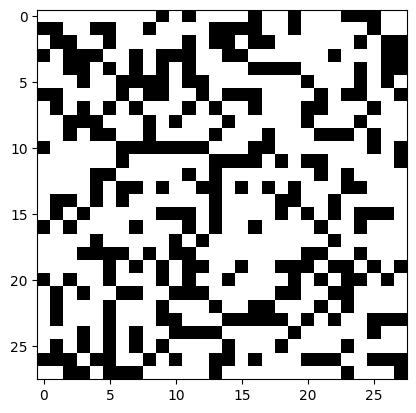

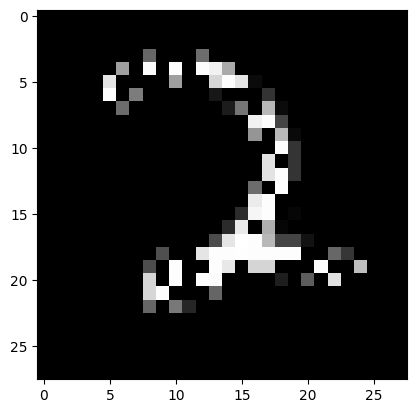

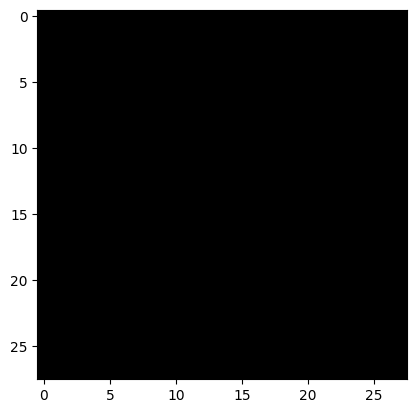

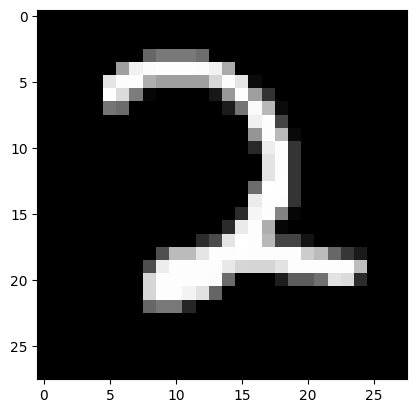

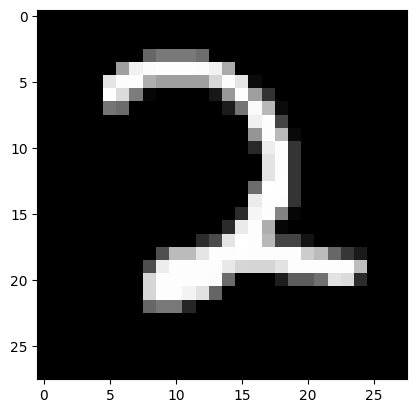

In [3]:

sample_image_batch, _ = next(iter(train_mnist_loader))
print(sample_image_batch.shape)
np_batch, img_batch = val_processor.process_batch(sample_image_batch, 500)
context_x, context_y, target_x, target_y = np_batch.get_all()

context_x_mask, context_y_mask = get_masks(context_x, context_y, img_batch.shape[-1])
target_x_mask, target_y_mask = get_masks(target_x, target_y, img_batch.shape[-1])

# plot mask
import matplotlib.pyplot as plt

plt.imshow(context_x_mask[0], cmap='gray')
plt.show()

plt.imshow(context_y_mask[0], cmap='gray')
plt.show()

plt.imshow(target_x_mask[0], cmap='gray')
plt.show()

plt.imshow(target_y_mask[0], cmap='gray')
plt.show()

plt.imshow(img_batch[0][0], cmap='gray')
plt.show()

Exception reporting mode: Verbose
Using device: cuda
Epoch: 0 Iteration: 0 Train NLL: 0.8294
Epoch: 0 Iteration: 200 Train NLL: 0.1779
Epoch: 0 Iteration: 400 Train NLL: -0.3376
Epoch: 0 Iteration: 600 Train NLL: -0.4360
Epoch: 0 Iteration: 800 Train NLL: -0.4754
Epoch: 0 Iteration: 1000 Train NLL: -0.5036
Epoch: 0 Iteration: 1200 Train NLL: -0.5235
Epoch: 0 Iteration: 1400 Train NLL: -0.5493
Epoch: 0 Iteration: 1600 Train NLL: -0.5362
Epoch: 0 Iteration: 1800 Train NLL: -0.5533
Epoch: 0 Iteration: 2000 Train NLL: -0.5471
Epoch: 0 Iteration: 2200 Train NLL: -0.5699
Epoch: 0 Iteration: 2400 Train NLL: -0.5685
Epoch: 0 Iteration: 2600 Train NLL: -0.5623
Epoch: 0 Iteration: 2800 Train NLL: -0.5650
Epoch: 0 Iteration: 3000 Train NLL: -0.5788
Epoch: 0 Iteration: 3200 Train NLL: -0.5744


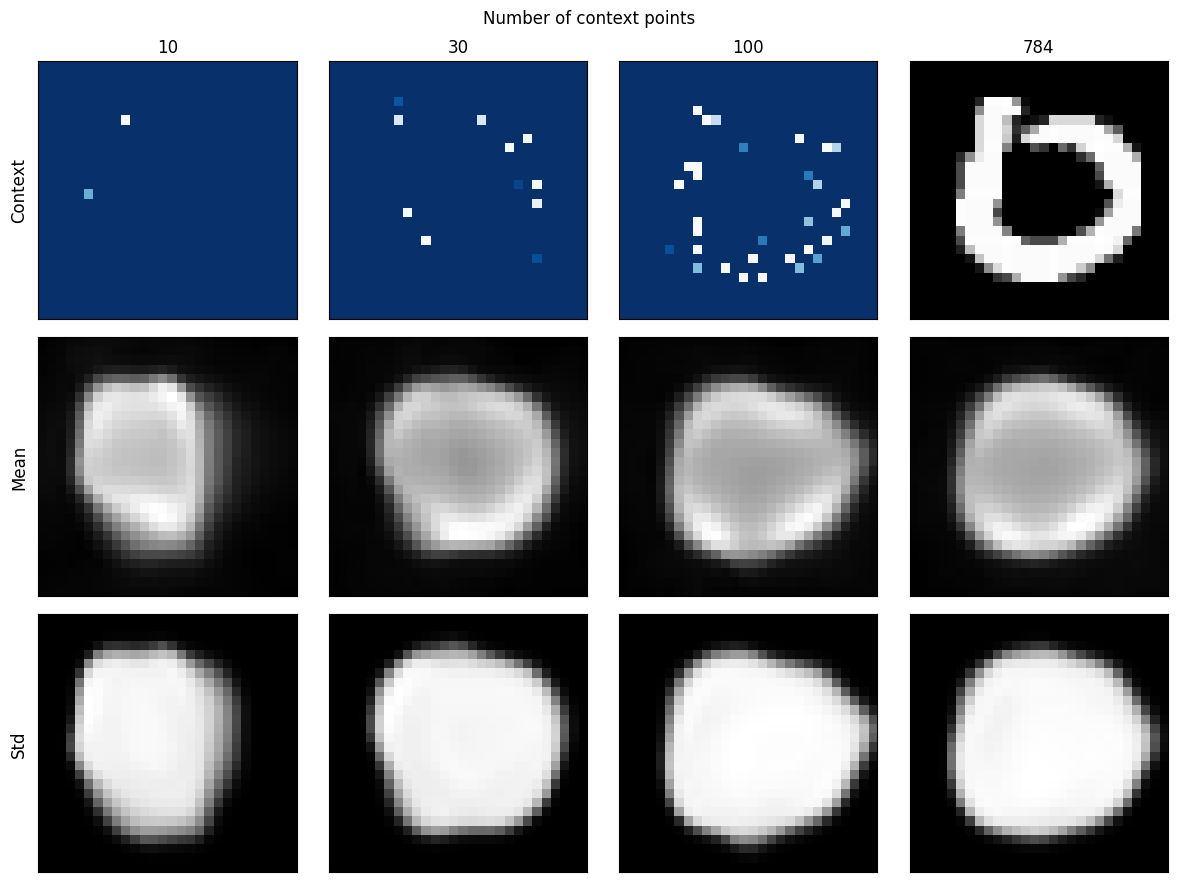

Validation NLL: -0.5572 

Epoch: 1 Iteration: 0 Train NLL: -0.5846
Epoch: 1 Iteration: 200 Train NLL: -0.5816
Epoch: 1 Iteration: 400 Train NLL: -0.5787
Epoch: 1 Iteration: 600 Train NLL: -0.5803
Epoch: 1 Iteration: 800 Train NLL: -0.6051
Epoch: 1 Iteration: 1000 Train NLL: -0.6068
Epoch: 1 Iteration: 1200 Train NLL: -0.5896
Epoch: 1 Iteration: 1400 Train NLL: -0.6038
Epoch: 1 Iteration: 1600 Train NLL: -0.6032
Epoch: 1 Iteration: 1800 Train NLL: -0.5898
Epoch: 1 Iteration: 2000 Train NLL: -0.6031
Epoch: 1 Iteration: 2200 Train NLL: -0.5908
Epoch: 1 Iteration: 2400 Train NLL: -0.6033
Epoch: 1 Iteration: 2600 Train NLL: -0.5968
Epoch: 1 Iteration: 2800 Train NLL: -0.6089
Epoch: 1 Iteration: 3000 Train NLL: -0.6175
Epoch: 1 Iteration: 3200 Train NLL: -0.6142


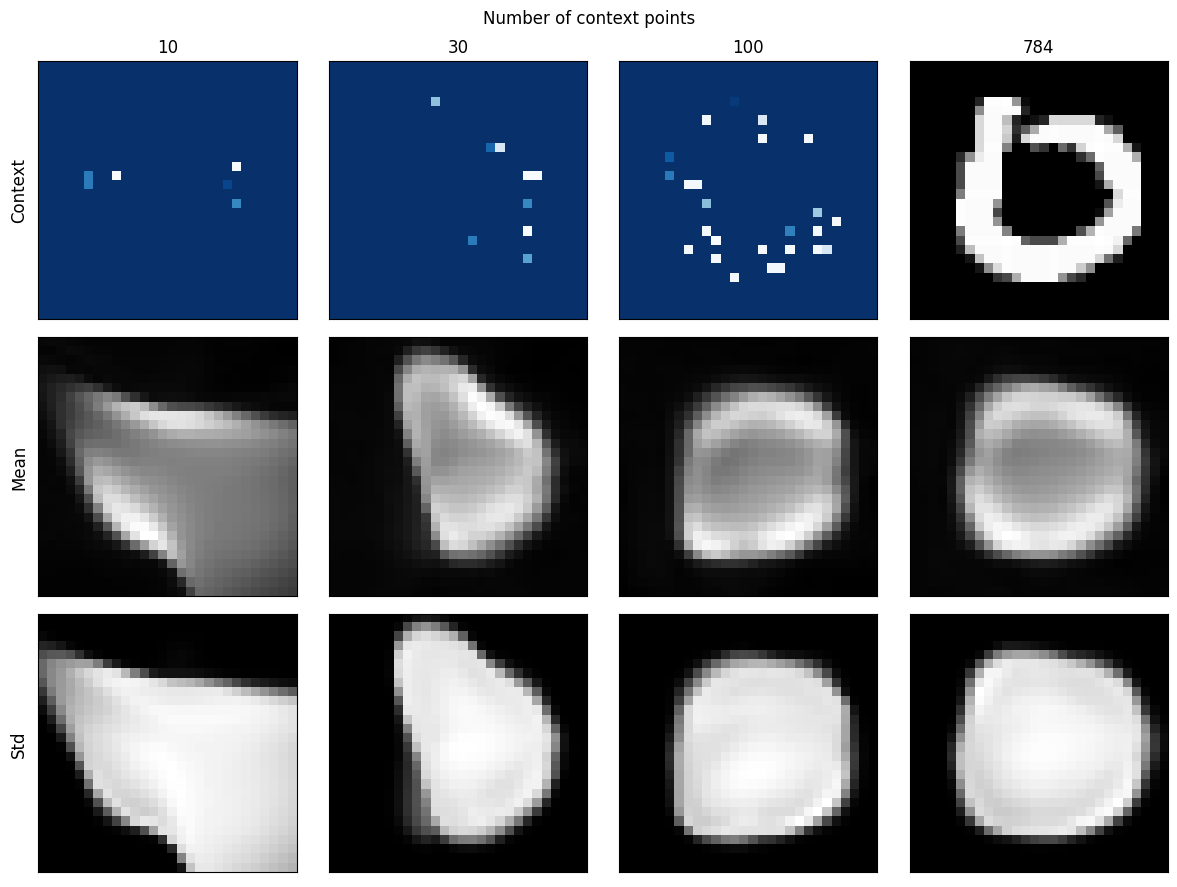

Validation NLL: -0.5803 

Epoch: 2 Iteration: 0 Train NLL: -0.6338
Epoch: 2 Iteration: 200 Train NLL: -0.6127
Epoch: 2 Iteration: 400 Train NLL: -0.6149
Epoch: 2 Iteration: 600 Train NLL: -0.6271
Epoch: 2 Iteration: 800 Train NLL: -0.6401
Epoch: 2 Iteration: 1000 Train NLL: -0.6246
Epoch: 2 Iteration: 1200 Train NLL: -0.6254
Epoch: 2 Iteration: 1400 Train NLL: -0.6365
Epoch: 2 Iteration: 1600 Train NLL: -0.6273
Epoch: 2 Iteration: 1800 Train NLL: -0.6318
Epoch: 2 Iteration: 2000 Train NLL: -0.6620
Epoch: 2 Iteration: 2200 Train NLL: -0.6346
Epoch: 2 Iteration: 2400 Train NLL: -0.6215
Epoch: 2 Iteration: 2600 Train NLL: -0.6457
Epoch: 2 Iteration: 2800 Train NLL: -0.6687
Epoch: 2 Iteration: 3000 Train NLL: -0.6314
Epoch: 2 Iteration: 3200 Train NLL: -0.6473


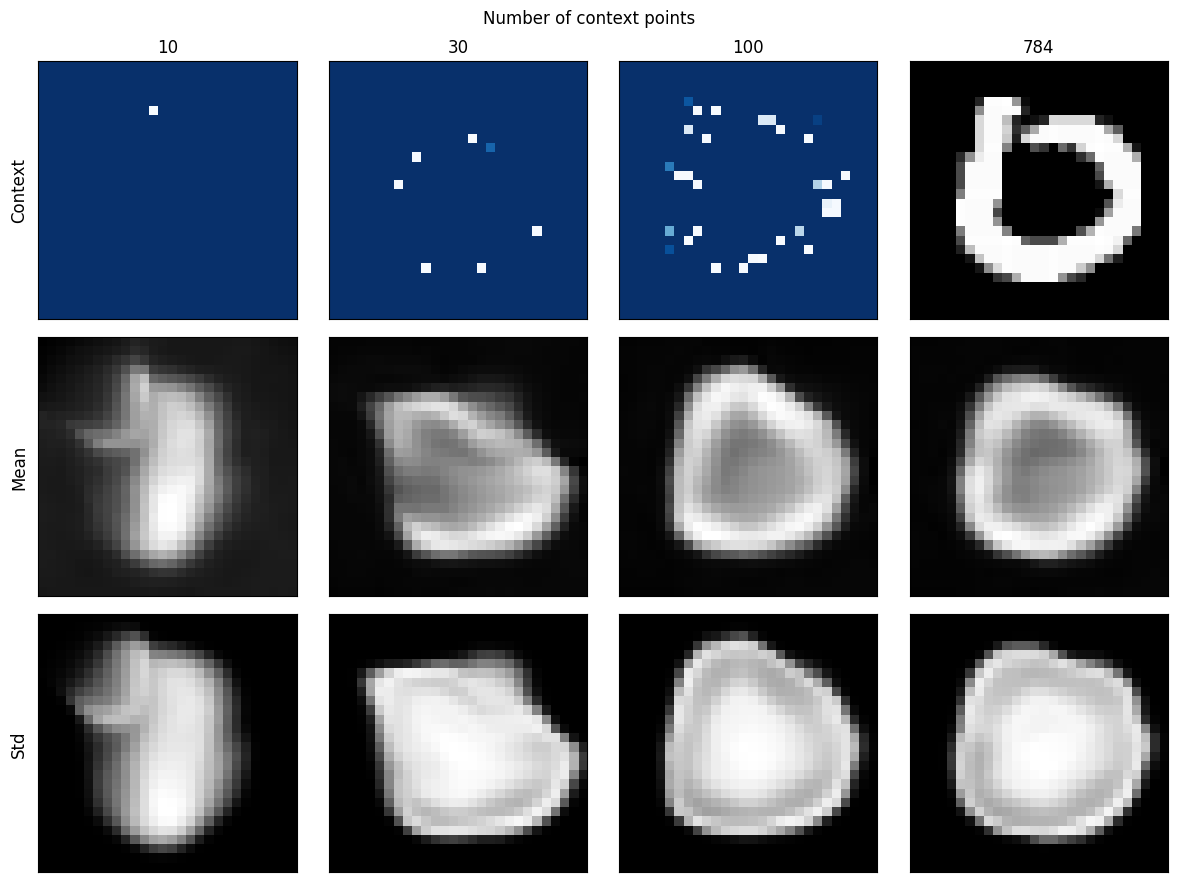

Validation NLL: -0.6059 

Epoch: 3 Iteration: 0 Train NLL: -0.6510
Epoch: 3 Iteration: 200 Train NLL: -0.6528
Epoch: 3 Iteration: 400 Train NLL: -0.6602
Epoch: 3 Iteration: 600 Train NLL: -0.6583
Epoch: 3 Iteration: 800 Train NLL: -0.6696
Epoch: 3 Iteration: 1000 Train NLL: -0.6754
Epoch: 3 Iteration: 1200 Train NLL: -0.6867
Epoch: 3 Iteration: 1400 Train NLL: -0.6561
Epoch: 3 Iteration: 1600 Train NLL: -0.6858
Epoch: 3 Iteration: 1800 Train NLL: -0.6571
Epoch: 3 Iteration: 2000 Train NLL: -0.6890
Epoch: 3 Iteration: 2200 Train NLL: -0.6898
Epoch: 3 Iteration: 2400 Train NLL: -0.6838
Epoch: 3 Iteration: 2600 Train NLL: -0.6904
Epoch: 3 Iteration: 2800 Train NLL: -0.6758
Epoch: 3 Iteration: 3000 Train NLL: -0.6853
Epoch: 3 Iteration: 3200 Train NLL: -0.6903


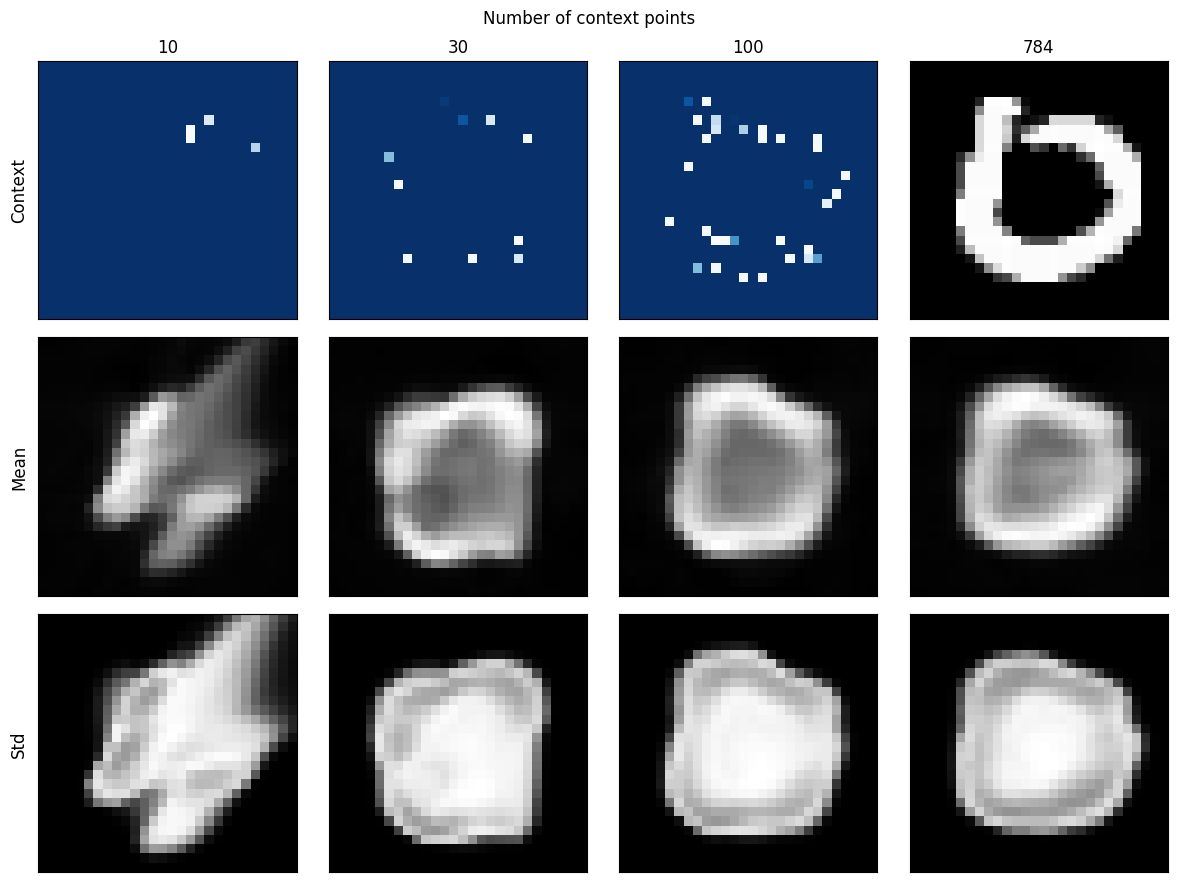

Validation NLL: -0.5823 

Epoch: 4 Iteration: 0 Train NLL: -0.7079
Epoch: 4 Iteration: 200 Train NLL: -0.6906
Epoch: 4 Iteration: 400 Train NLL: -0.7081
Epoch: 4 Iteration: 600 Train NLL: -0.6956
Epoch: 4 Iteration: 800 Train NLL: -0.6731
Epoch: 4 Iteration: 1000 Train NLL: -0.6958
Epoch: 4 Iteration: 1200 Train NLL: -0.7069
Epoch: 4 Iteration: 1400 Train NLL: -0.7007
Epoch: 4 Iteration: 1600 Train NLL: -0.6936
Epoch: 4 Iteration: 1800 Train NLL: -0.6935
Epoch: 4 Iteration: 2000 Train NLL: -0.6857
Epoch: 4 Iteration: 2200 Train NLL: -0.6945
Epoch: 4 Iteration: 2400 Train NLL: -0.6960
Epoch: 4 Iteration: 2600 Train NLL: -0.7147
Epoch: 4 Iteration: 2800 Train NLL: -0.6855
Epoch: 4 Iteration: 3000 Train NLL: -0.7128
Epoch: 4 Iteration: 3200 Train NLL: -0.7127


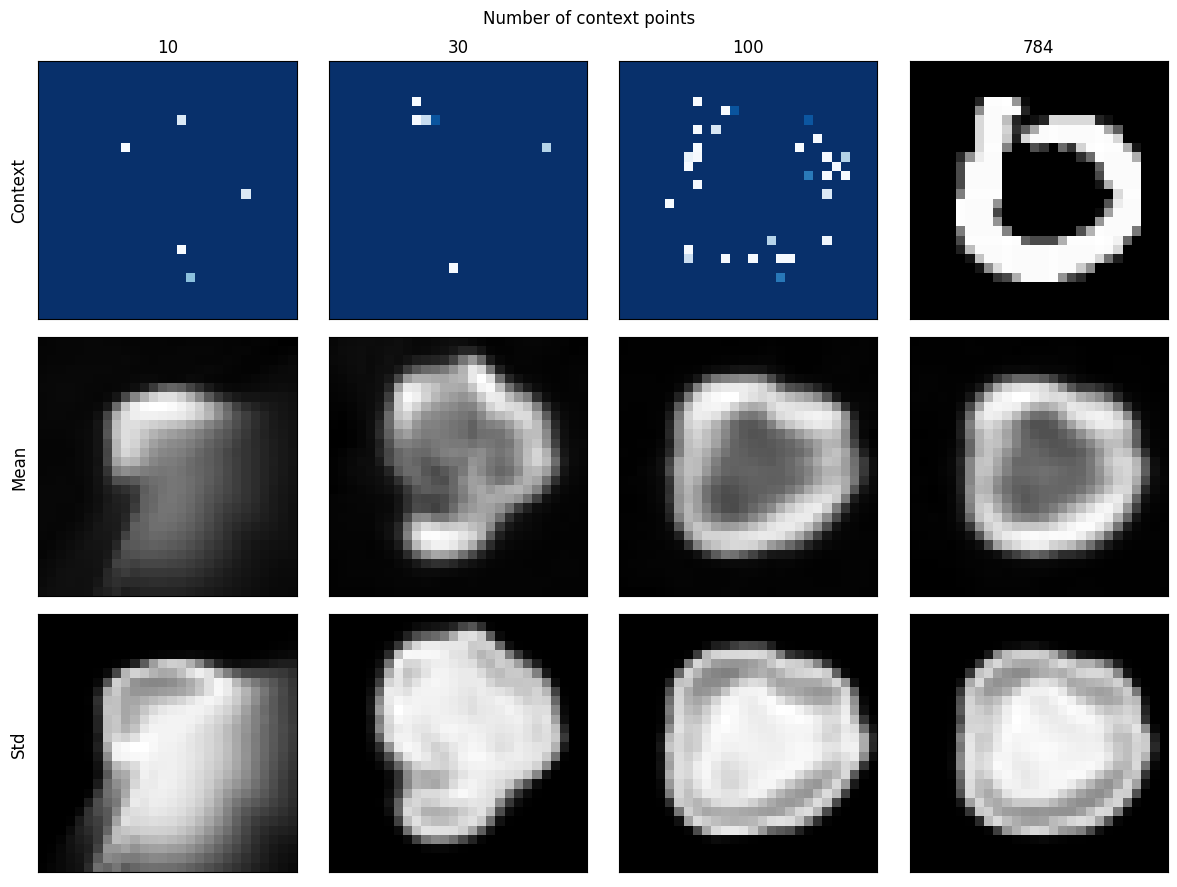

Validation NLL: -0.6413 

Epoch: 5 Iteration: 0 Train NLL: -0.7109
Epoch: 5 Iteration: 200 Train NLL: -0.7047
Epoch: 5 Iteration: 400 Train NLL: -0.6894
Epoch: 5 Iteration: 600 Train NLL: -0.6824
Epoch: 5 Iteration: 800 Train NLL: -0.7015
Epoch: 5 Iteration: 1000 Train NLL: -0.7073
Epoch: 5 Iteration: 1200 Train NLL: -0.7023
Epoch: 5 Iteration: 1400 Train NLL: -0.7032
Epoch: 5 Iteration: 1600 Train NLL: -0.6898
Epoch: 5 Iteration: 1800 Train NLL: -0.7153
Epoch: 5 Iteration: 2000 Train NLL: -0.7141
Epoch: 5 Iteration: 2200 Train NLL: -0.7119
Epoch: 5 Iteration: 2400 Train NLL: -0.7113
Epoch: 5 Iteration: 2600 Train NLL: -0.7134
Epoch: 5 Iteration: 2800 Train NLL: -0.7153
Epoch: 5 Iteration: 3000 Train NLL: -0.7310
Epoch: 5 Iteration: 3200 Train NLL: -0.7104


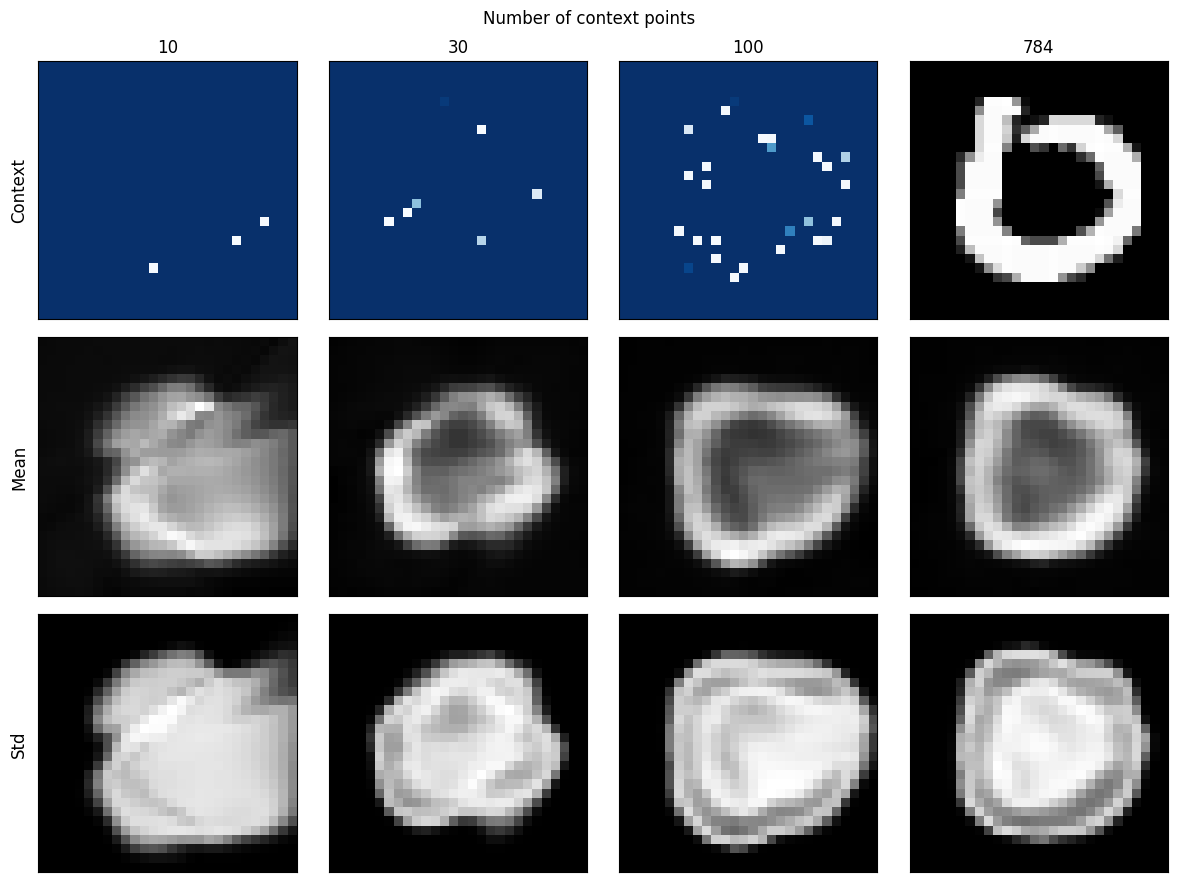

Validation NLL: -0.6708 

Epoch: 6 Iteration: 0 Train NLL: -0.7426
Epoch: 6 Iteration: 200 Train NLL: -0.7344
Epoch: 6 Iteration: 400 Train NLL: -0.7010
Epoch: 6 Iteration: 600 Train NLL: -0.7118
Epoch: 6 Iteration: 800 Train NLL: -0.7275
Epoch: 6 Iteration: 1000 Train NLL: -0.7257
Epoch: 6 Iteration: 1200 Train NLL: -0.7250
Epoch: 6 Iteration: 1400 Train NLL: -0.7160
Epoch: 6 Iteration: 1600 Train NLL: -0.7175
Epoch: 6 Iteration: 1800 Train NLL: -0.7013
Epoch: 6 Iteration: 2000 Train NLL: -0.6963
Epoch: 6 Iteration: 2200 Train NLL: -0.7351
Epoch: 6 Iteration: 2400 Train NLL: -0.7312
Epoch: 6 Iteration: 2600 Train NLL: -0.7136
Epoch: 6 Iteration: 2800 Train NLL: -0.7250
Epoch: 6 Iteration: 3000 Train NLL: -0.7232
Epoch: 6 Iteration: 3200 Train NLL: -0.7113


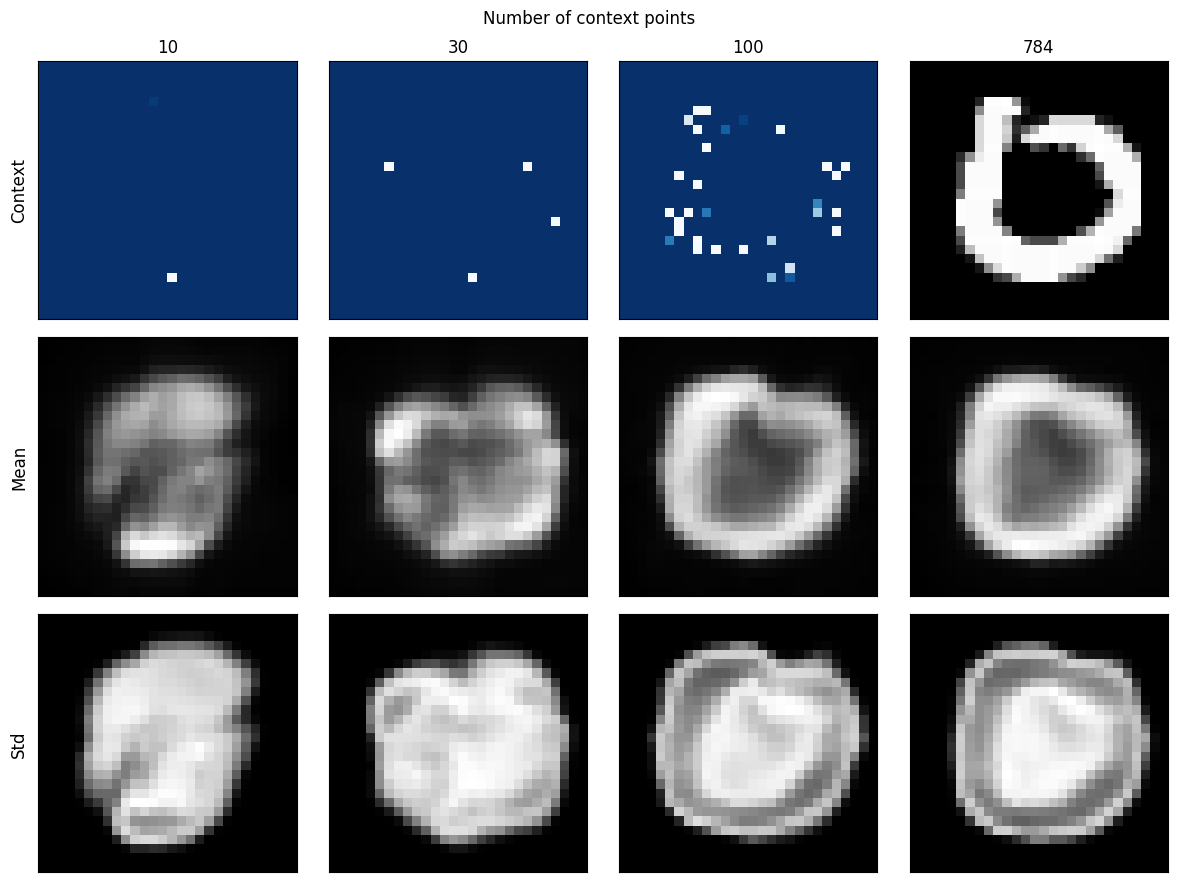

Validation NLL: -0.6688 

Epoch: 7 Iteration: 0 Train NLL: -0.7086
Epoch: 7 Iteration: 200 Train NLL: -0.7293
Epoch: 7 Iteration: 400 Train NLL: -0.7004
Epoch: 7 Iteration: 600 Train NLL: -0.7245
Epoch: 7 Iteration: 800 Train NLL: -0.7334
Epoch: 7 Iteration: 1000 Train NLL: -0.7120
Epoch: 7 Iteration: 1200 Train NLL: -0.7258
Epoch: 7 Iteration: 1400 Train NLL: -0.7166
Epoch: 7 Iteration: 1600 Train NLL: -0.7409
Epoch: 7 Iteration: 1800 Train NLL: -0.7369
Epoch: 7 Iteration: 2000 Train NLL: -0.7204
Epoch: 7 Iteration: 2200 Train NLL: -0.7243
Epoch: 7 Iteration: 2400 Train NLL: -0.7385
Epoch: 7 Iteration: 2600 Train NLL: -0.7195
Epoch: 7 Iteration: 2800 Train NLL: -0.7337
Epoch: 7 Iteration: 3000 Train NLL: -0.7158
Epoch: 7 Iteration: 3200 Train NLL: -0.7263


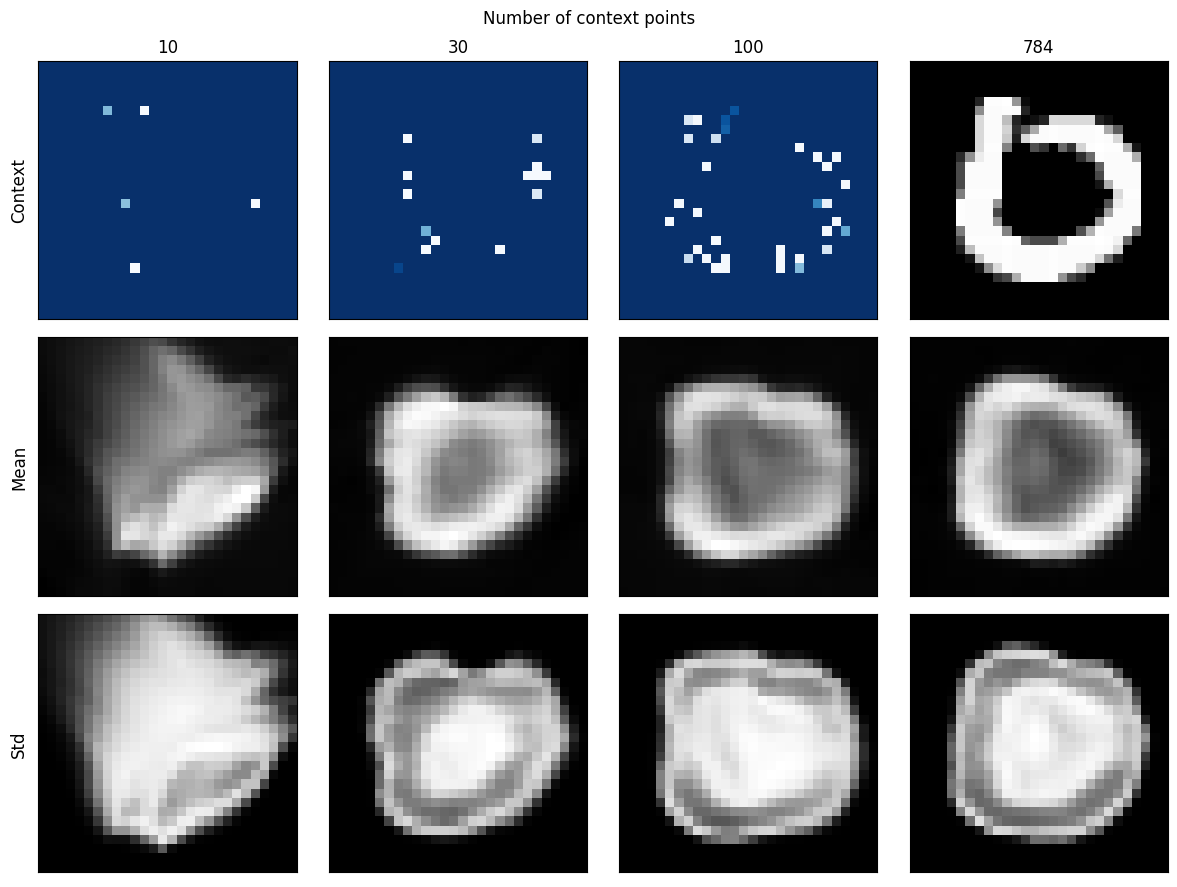

Validation NLL: -0.6779 

Epoch: 8 Iteration: 0 Train NLL: -0.7269
Epoch: 8 Iteration: 200 Train NLL: -0.7362
Epoch: 8 Iteration: 400 Train NLL: -0.7238
Epoch: 8 Iteration: 600 Train NLL: -0.7331
Epoch: 8 Iteration: 800 Train NLL: -0.7254
Epoch: 8 Iteration: 1000 Train NLL: -0.7433
Epoch: 8 Iteration: 1200 Train NLL: -0.7283
Epoch: 8 Iteration: 1400 Train NLL: -0.7325
Epoch: 8 Iteration: 1600 Train NLL: -0.7332
Epoch: 8 Iteration: 1800 Train NLL: -0.7523
Epoch: 8 Iteration: 2000 Train NLL: -0.7332
Epoch: 8 Iteration: 2200 Train NLL: -0.7402
Epoch: 8 Iteration: 2400 Train NLL: -0.7304
Epoch: 8 Iteration: 2600 Train NLL: -0.7487
Epoch: 8 Iteration: 2800 Train NLL: -0.7350
Epoch: 8 Iteration: 3000 Train NLL: -0.7475
Epoch: 8 Iteration: 3200 Train NLL: -0.7362


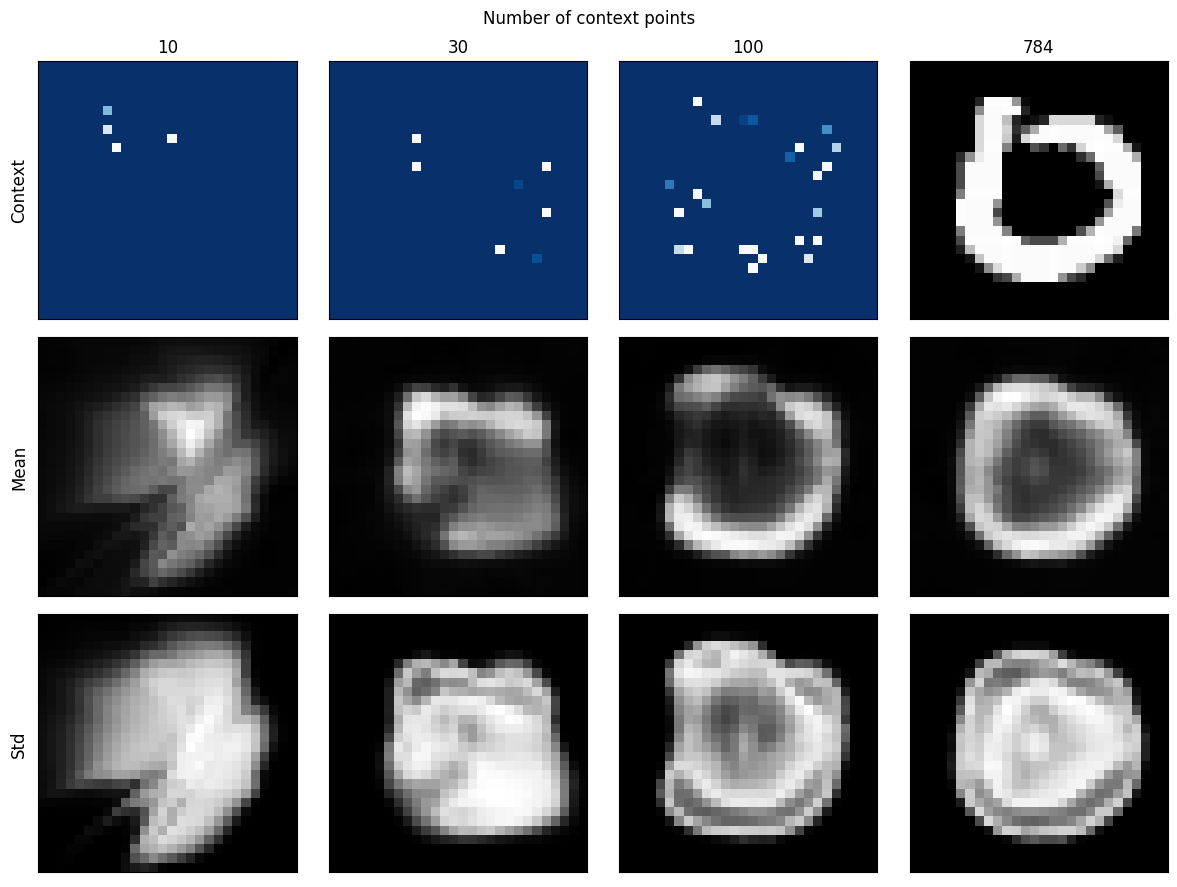

Validation NLL: -0.6655 

Epoch: 9 Iteration: 0 Train NLL: -0.7361
Epoch: 9 Iteration: 200 Train NLL: -0.7260
Epoch: 9 Iteration: 400 Train NLL: -0.7364
Epoch: 9 Iteration: 600 Train NLL: -0.7418
Epoch: 9 Iteration: 800 Train NLL: -0.7402
Epoch: 9 Iteration: 1000 Train NLL: -0.7463
Epoch: 9 Iteration: 1200 Train NLL: -0.7239
Epoch: 9 Iteration: 1400 Train NLL: -0.7362
Epoch: 9 Iteration: 1600 Train NLL: -0.7549
Epoch: 9 Iteration: 1800 Train NLL: -0.7461
Epoch: 9 Iteration: 2000 Train NLL: -0.7564
Epoch: 9 Iteration: 2200 Train NLL: -0.7440
Epoch: 9 Iteration: 2400 Train NLL: -0.7357
Epoch: 9 Iteration: 2600 Train NLL: -0.7441
Epoch: 9 Iteration: 2800 Train NLL: -0.7339
Epoch: 9 Iteration: 3000 Train NLL: -0.7438
Epoch: 9 Iteration: 3200 Train NLL: -0.7362


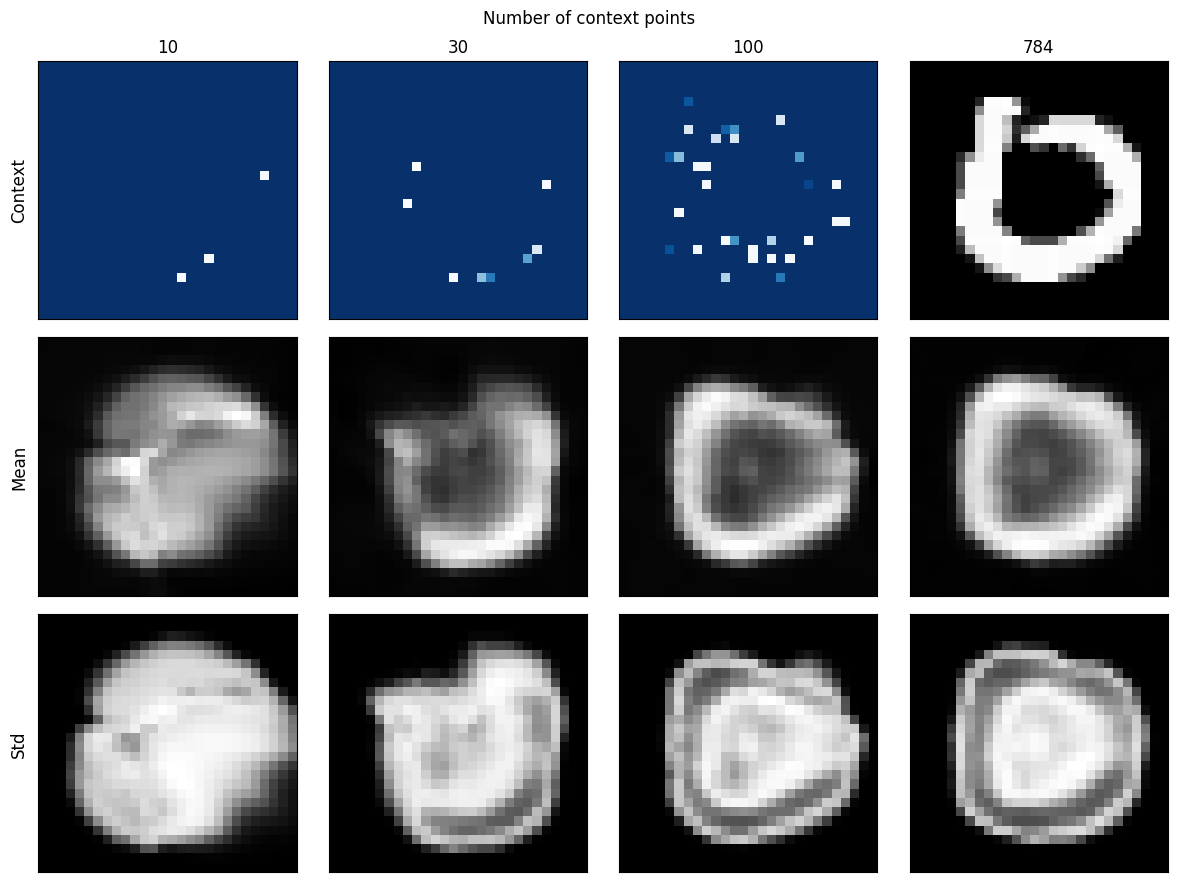

Validation NLL: -0.6974 

Epoch: 10 Iteration: 0 Train NLL: -0.7414
Epoch: 10 Iteration: 200 Train NLL: -0.7297
Epoch: 10 Iteration: 400 Train NLL: -0.7520
Epoch: 10 Iteration: 600 Train NLL: -0.7316
Epoch: 10 Iteration: 800 Train NLL: -0.7524
Epoch: 10 Iteration: 1000 Train NLL: -0.7433
Epoch: 10 Iteration: 1200 Train NLL: -0.7597
Epoch: 10 Iteration: 1400 Train NLL: -0.7432
Epoch: 10 Iteration: 1600 Train NLL: -0.7533
Epoch: 10 Iteration: 1800 Train NLL: -0.7566
Epoch: 10 Iteration: 2000 Train NLL: -0.7747
Epoch: 10 Iteration: 2200 Train NLL: -0.7446
Epoch: 10 Iteration: 2400 Train NLL: -0.7468
Epoch: 10 Iteration: 2600 Train NLL: -0.7620
Epoch: 10 Iteration: 2800 Train NLL: -0.7474
Epoch: 10 Iteration: 3000 Train NLL: -0.7399
Epoch: 10 Iteration: 3200 Train NLL: -0.7685


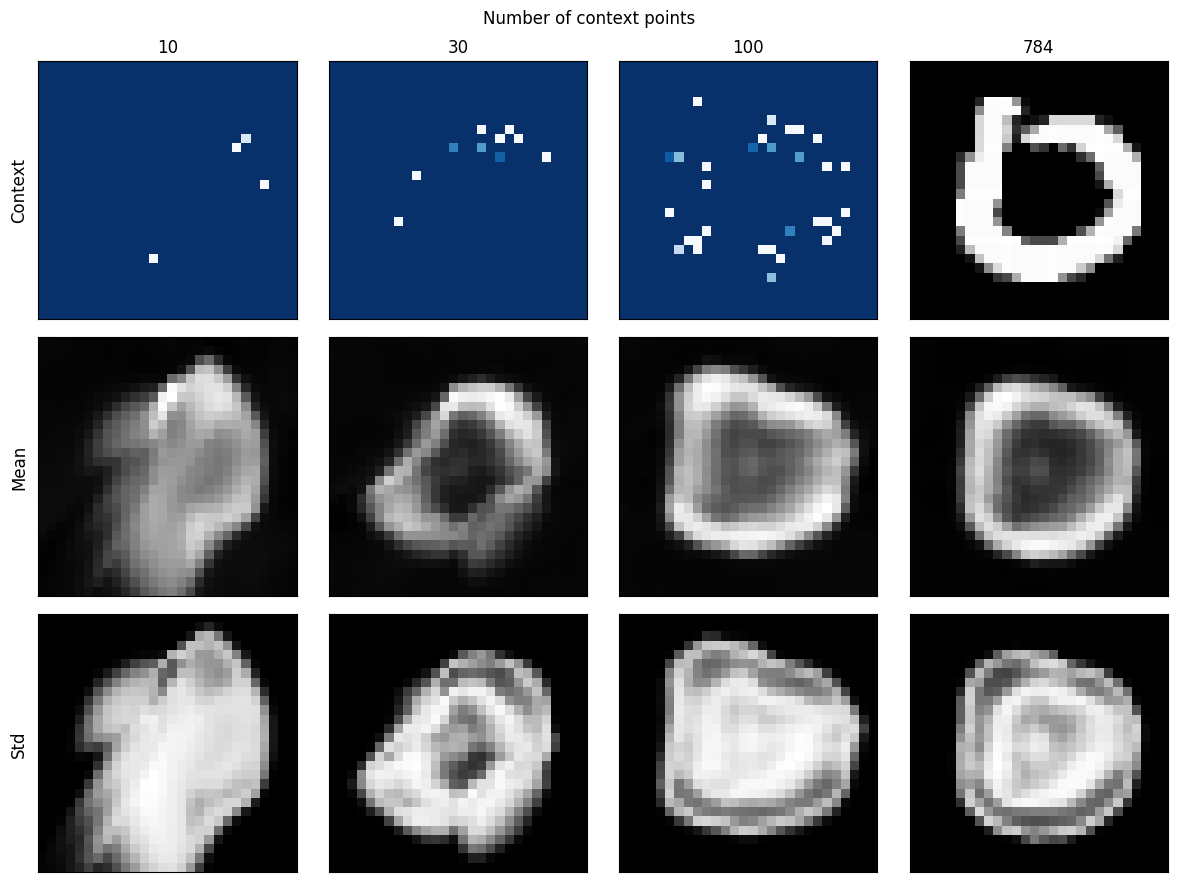

Validation NLL: -0.6642 

Epoch: 11 Iteration: 0 Train NLL: -0.7598
Epoch: 11 Iteration: 200 Train NLL: -0.7532
Epoch: 11 Iteration: 400 Train NLL: -0.7565
Epoch: 11 Iteration: 600 Train NLL: -0.7410
Epoch: 11 Iteration: 800 Train NLL: -0.7603
Epoch: 11 Iteration: 1000 Train NLL: -0.7426
Epoch: 11 Iteration: 1200 Train NLL: -0.7676
Epoch: 11 Iteration: 1400 Train NLL: -0.7578
Epoch: 11 Iteration: 1600 Train NLL: -0.7575
Epoch: 11 Iteration: 1800 Train NLL: -0.7617
Epoch: 11 Iteration: 2000 Train NLL: -0.7561
Epoch: 11 Iteration: 2200 Train NLL: -0.7525
Epoch: 11 Iteration: 2400 Train NLL: -0.7525
Epoch: 11 Iteration: 2600 Train NLL: -0.7698
Epoch: 11 Iteration: 2800 Train NLL: -0.7448
Epoch: 11 Iteration: 3000 Train NLL: -0.7547
Epoch: 11 Iteration: 3200 Train NLL: -0.7661


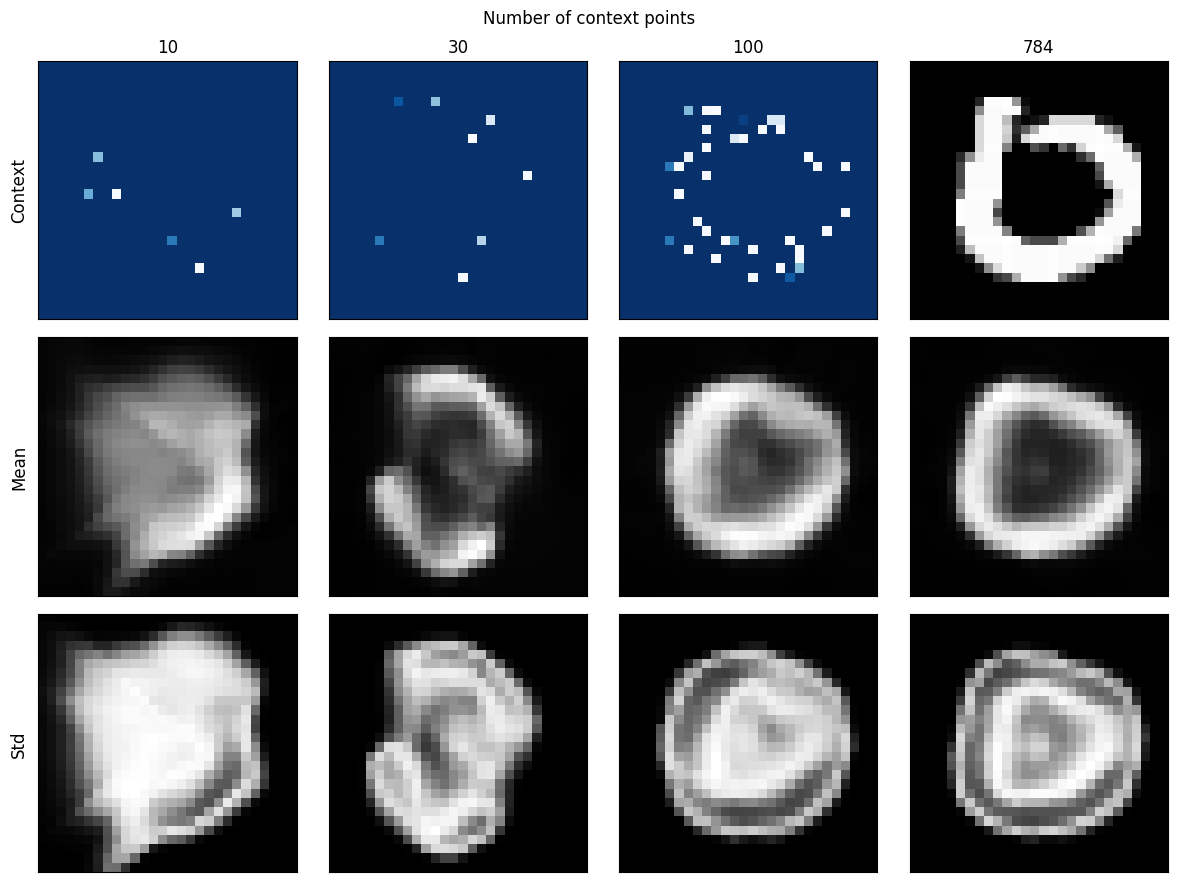

Validation NLL: -0.6895 

Epoch: 12 Iteration: 0 Train NLL: -0.7545
Epoch: 12 Iteration: 200 Train NLL: -0.7665
Epoch: 12 Iteration: 400 Train NLL: -0.7530
Epoch: 12 Iteration: 600 Train NLL: -0.7545
Epoch: 12 Iteration: 800 Train NLL: -0.7593
Epoch: 12 Iteration: 1000 Train NLL: -0.7589
Epoch: 12 Iteration: 1200 Train NLL: -0.7541
Epoch: 12 Iteration: 1400 Train NLL: -0.7626
Epoch: 12 Iteration: 1600 Train NLL: -0.7719
Epoch: 12 Iteration: 1800 Train NLL: -0.7728
Epoch: 12 Iteration: 2000 Train NLL: -0.7559
Epoch: 12 Iteration: 2200 Train NLL: -0.7740
Epoch: 12 Iteration: 2400 Train NLL: -0.7909
Epoch: 12 Iteration: 2600 Train NLL: -0.7555
Epoch: 12 Iteration: 2800 Train NLL: -0.7721
Epoch: 12 Iteration: 3000 Train NLL: -0.7809
Epoch: 12 Iteration: 3200 Train NLL: -0.7704


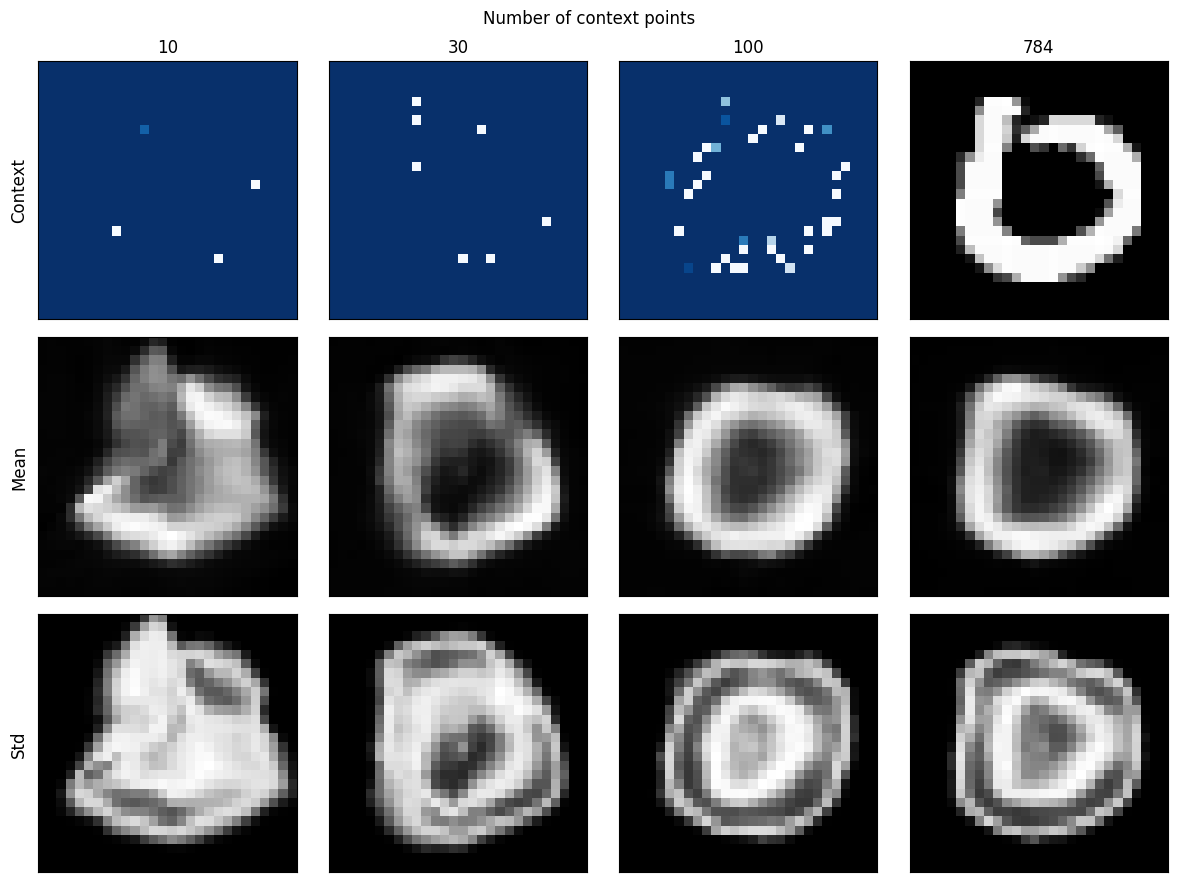

Validation NLL: -0.7089 

Epoch: 13 Iteration: 0 Train NLL: -0.7766
Epoch: 13 Iteration: 200 Train NLL: -0.7721
Epoch: 13 Iteration: 400 Train NLL: -0.7548
Epoch: 13 Iteration: 600 Train NLL: -0.7726
Epoch: 13 Iteration: 800 Train NLL: -0.7767
Epoch: 13 Iteration: 1000 Train NLL: -0.7515
Epoch: 13 Iteration: 1200 Train NLL: -0.7545
Epoch: 13 Iteration: 1400 Train NLL: -0.7574
Epoch: 13 Iteration: 1600 Train NLL: -0.7451
Epoch: 13 Iteration: 1800 Train NLL: -0.7876
Epoch: 13 Iteration: 2000 Train NLL: -0.7460
Epoch: 13 Iteration: 2200 Train NLL: -0.7685
Epoch: 13 Iteration: 2400 Train NLL: -0.7750
Epoch: 13 Iteration: 2600 Train NLL: -0.7999
Epoch: 13 Iteration: 2800 Train NLL: -0.7730
Epoch: 13 Iteration: 3000 Train NLL: -0.7606
Epoch: 13 Iteration: 3200 Train NLL: -0.7804


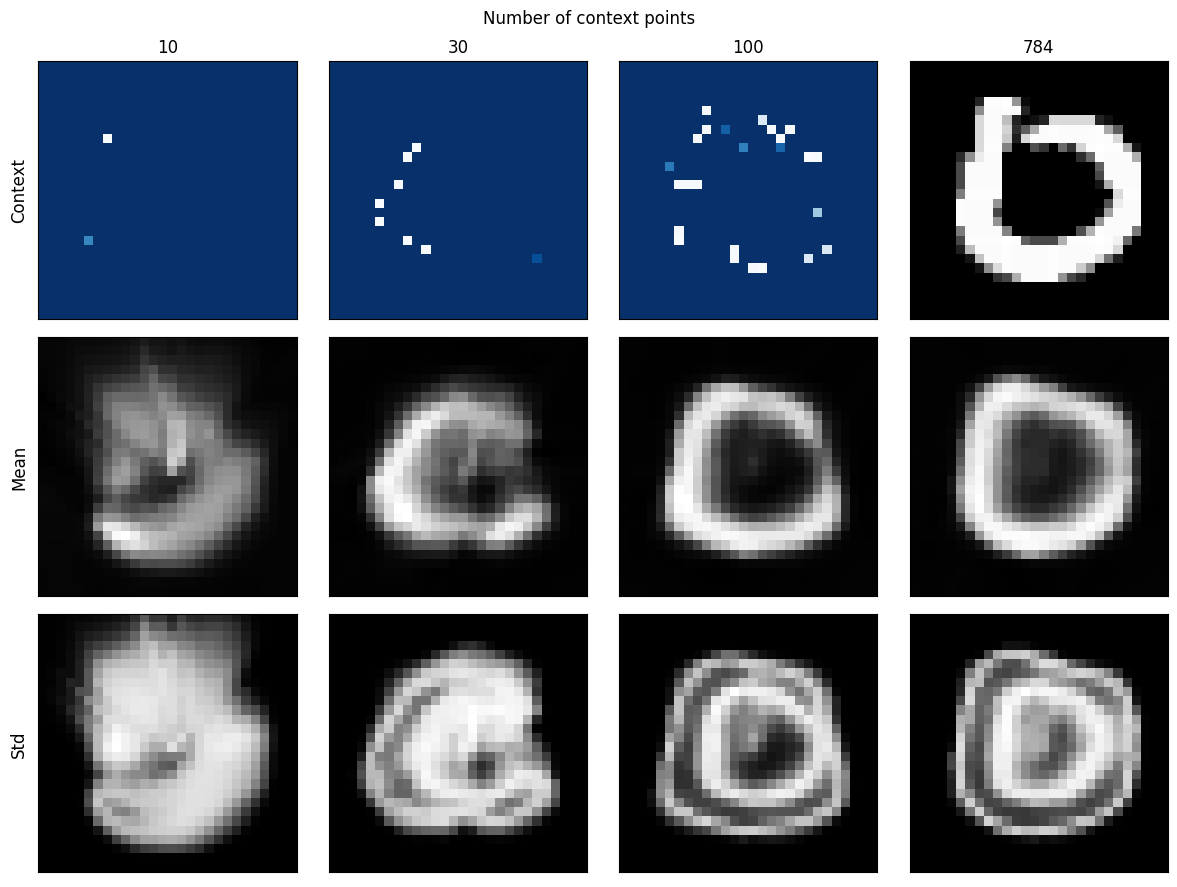

Validation NLL: -0.7056 

Epoch: 14 Iteration: 0 Train NLL: -0.7663
Epoch: 14 Iteration: 200 Train NLL: -0.7732
Epoch: 14 Iteration: 400 Train NLL: -0.7639
Epoch: 14 Iteration: 600 Train NLL: -0.7843
Epoch: 14 Iteration: 800 Train NLL: -0.7955
Epoch: 14 Iteration: 1000 Train NLL: -0.7896
Epoch: 14 Iteration: 1200 Train NLL: -0.7848
Epoch: 14 Iteration: 1400 Train NLL: -0.7767
Epoch: 14 Iteration: 1600 Train NLL: -0.7640
Epoch: 14 Iteration: 1800 Train NLL: -0.7759
Epoch: 14 Iteration: 2000 Train NLL: -0.7838
Epoch: 14 Iteration: 2200 Train NLL: -0.7676
Epoch: 14 Iteration: 2400 Train NLL: -0.7705
Epoch: 14 Iteration: 2600 Train NLL: -0.7731
Epoch: 14 Iteration: 2800 Train NLL: -0.7814
Epoch: 14 Iteration: 3000 Train NLL: -0.7876
Epoch: 14 Iteration: 3200 Train NLL: -0.7730


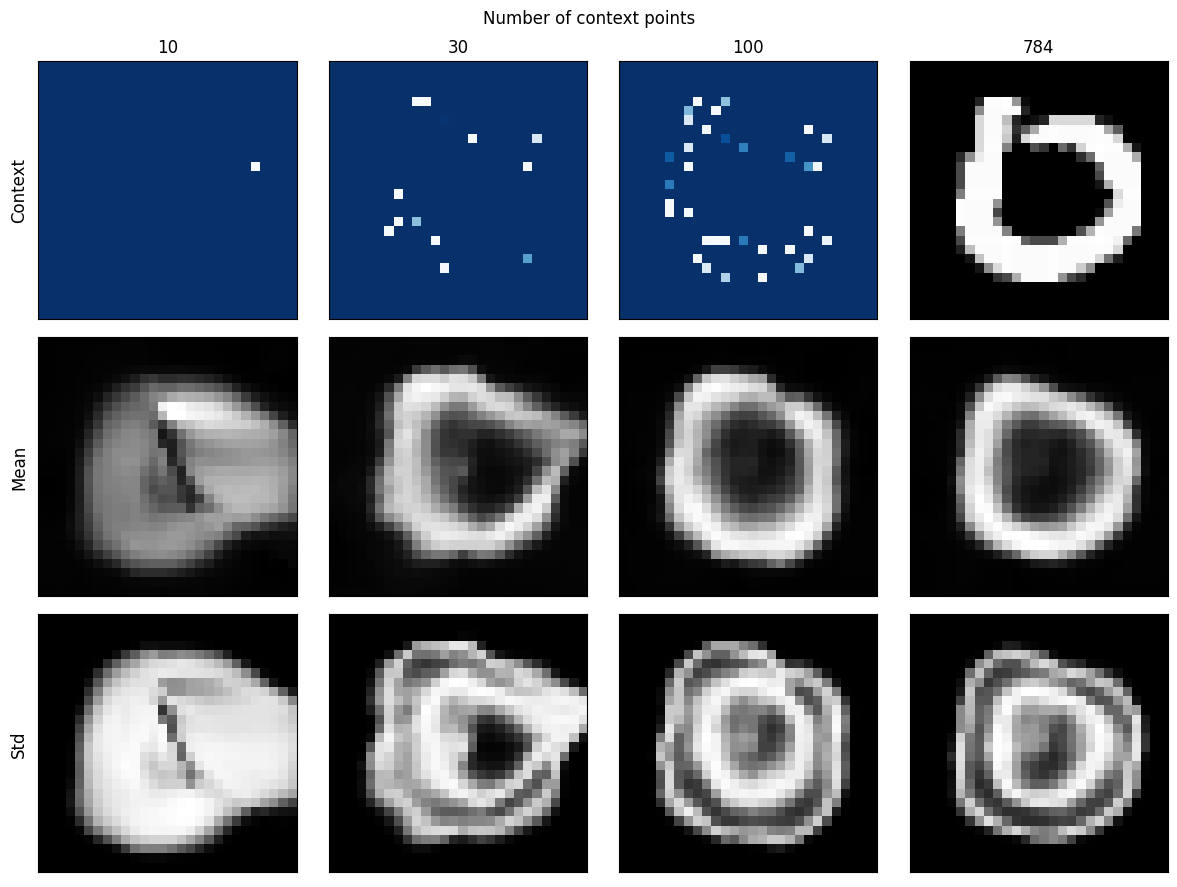

Validation NLL: -0.7001 

Epoch: 15 Iteration: 0 Train NLL: -0.7757
Epoch: 15 Iteration: 200 Train NLL: -0.7879
Epoch: 15 Iteration: 400 Train NLL: -0.7776
Epoch: 15 Iteration: 600 Train NLL: -0.7733


In [4]:
%xmode Verbose
attention = Attention(attention_type="transformer")
model = ANPModel(x_dim=2, y_dim=1, hidden_dim=128, attention=attention, latent_encoder_layers=6, deterministic_encoder_layers=6, decoder_layers=4, use_self_attention=False)
import traceback
try:
    train_2d(model, train_mnist_loader, val_mnist_loader, epochs=100000)
except:
    traceback.print_exc()
